# PyTorch - Recurrent Neural Networks 
## BSDS4 Deep Learning Elective
2022 DS Elective 4 <br>
University of Science and Technology of the Philippines <br>
<br>
Instructor: Romen Samuel Wabina, MSc <br>
*ongoing* PhD Data Science and AI <br>
MSc Data Science and AI, Asian Institute of Technology <br>
BS Applied Mathematics - Operations Research, University of the Philippines

- https://pytorch.org/tutorials/

## A. Motivation Behind RNNs
A major characteristic of all neural networks you’ve seen so far, such as densely connected networks and CNNs, is that they have no memory. Each input shown to
them is processed independently, with no state kept in between inputs. With such networks, in order to process a sequence or a temporal series of data points, you have to
show the entire sequence to the network at once: turn it into a single data point.

For instance, as you’re reading the present sentence, you’re processing it word by word—or rather, eye saccade by eye saccade—while keeping memories of what came
before; this gives you a fluid representation of the meaning conveyed by this sentence. Biological intelligence processes information incrementally while maintaining an
internal model of what it’s processing, built from past information and constantly updated as new information comes in.

What happens when the thing we're trying to explain changes over time? What if a predicted value depends on a series of past behaviors? We can train networks to tell us that an image contains a car. How do we answer the question "Is the car moving? Where will it be a minute from now?" 

**This challenge of incorporating a series of measurements over time into the model parameters is addressed by <a href='https://en.wikipedia.org/wiki/Recurrent_neural_network'>Recurrent Neural Networks</a> (RNNs).**




## B. Introduction: Recurrent Neural Networks
The RNNs are a class of neural networks that allow previous outputs to be used as inputs while having hidden states. It processes **sequences** by iterating through the sequence elements and maintaining a state containing information relative to what it has seen so far.

In effect, an RNN is a type of neural network that has an internal loop.

<center>
<img src = 'figures/rnn.jpg' width = '300'>
</center>  

The state of the RNN is reset between processing two different, independent sequences, so you still consider one sequence a single data point: a single input to the network. What changes is that this data point is no longer processed in a single step; rather, the network internally loops over sequence elements.

To make these notions of *loop* and *state* clear, let’s implement the forward pass of a very simple RNN in Numpy. This RNN takes as input a sequence of vectors, which you’ll encode as a 2D tensor of size <code>(timesteps, input_features)</code>.

It loops over timesteps, and at each timestep, it considers its current state at $t$ and the input at $t$ (of shape <code>(input_features, )</code>, and combines them to obtain the output at $t$. You’ll then set the state for the next step to be this previous output. For the first timestep, the previous output isn’t defined; hence, there is no current state. So, you’ll initialize the state as an allzero vector called the initial state of the network.

```
state_t = 0
for input_t in input_sequence:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b) # Simple RNN Layer
    state_t = output_t
```


In [12]:
import numpy as np
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
# print(inputs)
state_t = np.zeros((output_features,))
# print(state_t)

# Random Weight Matrices
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []

for input_t in inputs:
    # Combines the input with the current state (i.e., previous state)
    # to obtain the current output
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.concatenate(successive_outputs, axis=0)
# The final output is a 2D tensor of shape (timesteps, output_features)

In [ ]:
y = wx + b

#### In summary, an RNN is a <code>for</code> loop that reuses quantities computed during the previous iteration of the loop, nothing more.

The output $o_t$ of a recurrent layer for a single instance: 
$$
    o_t = \sigma(W_{io} x_t + b_{io} + W_{ho} h_{(t-1)} + b_{ho}) \\
$$


RNNs are characterized by their step function, such as the following function in this case
- <code>output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)</code>

<center>
<img src = 'figures/rnnroll.jpg' width = '900'>

The final output is a 2D tensor of shape <code>(timesteps, output_features)</code>, where each timestep is the output of the loop at time $t$. Each timestep $t$ in the output tensor contains information about timesteps 0 to $t$ in the input sequence—about the entire past. For this reason, in many cases, you don’t need this full sequence of outputs; you just need the last output (<code>output_t</code> at the end of the loop), because it already contains information about the entire sequence.
</center>  

<center>
<img src = 'figures/rnnsim.gif' width = '1000'>
</center>  

The input layer ‘x’ takes in the input to the neural network and processes it and passes it onto the middle layer. 

The middle layer ‘h’ can consist of multiple hidden layers, each with its own activation functions and weights and biases. If you have a neural network where the various parameters of different hidden layers are not affected by the previous layer, ie: the neural network does not have memory, then you can use a recurrent neural network.

### Important note:

- Another distinguishing characteristic of recurrent networks is that they **share parameters across each layer of the network**. While feedforward networks have different weights across each node, recurrent neural networks share the same weight parameter within each layer of the network. That said, these weights are still adjusted in the through the processes of backpropagation and gradient descent to facilitate reinforcement learning.

- Recurrent neural networks leverage backpropagation through time (BPTT) algorithm to determine the gradients, which is slightly different from traditional backpropagation as it is specific to sequence data. 
    - The principles of BPTT are the same as traditional backpropagation, where the model trains itself by calculating errors from its output layer to its input layer. These calculations allow us to adjust and fit the parameters of the model appropriately. 
    - BPTT differs from the traditional approach in that BPTT sums errors at each time step whereas feedforward networks do not need to sum errors as they do not share parameters across each layer.

- Through this process, RNNs tend to run into two problems, known as exploding gradients and vanishing gradients.

## C. Types of Recurrent Neural Networks

The RNN can simultaneously take a sequence of inputs and produce a sequence of outputs. It can also produce a single output from a sequence of inputs. In this section, we will explore what are the different types of RNNs.

1. Vector-to-Vector (One-to-One): Traditional Neural Network

2. Vector-to-Seq RNN (One-to-Many): This type of neural network has a single input and multiple outputs. For example, the input could be an image (or the output of a CNN), and the output could be a caption for that image. This RNN can also be used in music generation.

<center>
<img src = 'figures/one2many.jpg' width = '400'>
</center>  

3. Seq-to-Vector RNN (Many-to-One): You can feed the network a sequence of inputs and ignore all output except for the last one. In other words, you can feed the network a sequence of words corresponding to a movie review, and the network could output a sentiment score. 

<center>
<img src = 'figures/many2one.jpg' width = '400'>
</center>  

4. Seq-to-Seq RNN (Many-to-Many): An RNN can simultaneously take a sequence of inputs and produce a sequence of outputs. This is useful for predicting time series such as stock prices: you feed it the prices over the last $N$ days, and it must output the proces shifted by one day into the future. This model can be used for name entity recognition and machine translation.

<center>
<img src = 'figures/many2many.jpg' width = '400'>
</center>  


## D. Long-term dependencies (Seq2Seq)
- Commonly used activation functions: The most common activation functions used in RNN modules are described below:

<center>
<img src = 'figures/activation.jpg' width = '900'>
</center>  

## E. Advantages and Disadvantages of RNN

**Advantages**
1. The RNN remembers each and every information through time. It is useful in time series prediction only because of the feature to remember previous inputs as well.
2. The Recurrent neural network are even used with convolutional layers to extend the effective pixel neighborhood.

**Disadvantages**
1. Simple RNN cannot learn long-term dependencies due to gradient vanishing and exploding problems.
2. Training an RNN is a very difficult task.
3. It cannot process very long sequences if using tanh or relu as an activation function.

- How to solve the exploding gradient problem?
    - Use Gradient Clipping - It is a technique used to cope with the exploding gradient problem sometimes encountered when performing backpropagation. By capping the maximum value for the gradient, this phenomenon is controlled in practice.

<center>
<img src = 'figures/clip.jpg' width = '300'>
</center>  

## F. PyTorch Implementation

PyTorch offers a number of RNN layers and options.<br>
* <a href='https://pytorch.org/docs/stable/nn.html#rnn'><tt><strong>torch.nn.RNN()</strong></tt></a> provides a basic model which applies a multilayer RNN with either <em>tanh</em> or <em>ReLU</em> non-linearity functions to an input sequence.<br>
As we learned in the theory lectures, however, this has its limits.<br><br>
* <a href='https://pytorch.org/docs/stable/nn.html#lstm'><tt><strong>torch.nn.LSTM()</strong></tt></a> adds a multi-layer long short-term memory (LSTM) process which greatly extends the memory of the RNN.

## G. Long Short-Term Memory Network
<center>
<img src = 'figures/lstm.png' width = '900'>
</center>  

For each element in the input sequence, an LSTM layer computes the following functions:<br>
$\begin{array}{ll} \\
    i_t = \sigma(W_{ii} x_t + b_{ii} + W_{hi} h_{(t-1)} + b_{hi}) \\
    f_t = \sigma(W_{if} x_t + b_{if} + W_{hf} h_{(t-1)} + b_{hf}) \\
    g_t = \tanh(W_{ig} x_t + b_{ig} + W_{hg} h_{(t-1)} + b_{hg}) \\
    o_t = \sigma(W_{io} x_t + b_{io} + W_{ho} h_{(t-1)} + b_{ho}) \\
    c_t = f_t * c_{(t-1)} + i_t * g_t \\
    h_t = o_t * \tanh(c_t) \\
\end{array}$

where $h_t$ is the hidden state at time $t$, <br>
$c_t$ is the cell state at time $t$, <br>
$x_t$ is the input at time $t$, <br>
$h_{(t-1)}$ is the hidden state of the layer at time $t-1$ or the initial hidden state at time $0$, and <br>
$i_t, f_t, g_t, o_t$ are the input, forget, cell, and output gates, respectively.<br>
$\sigma$ is the sigmoid function, and $*$ is the Hadamard product.

In [13]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Create a sine wave dataset
For this exercise we'll look at a simple sine wave. We'll take 800 data points and assign 40 points per full cycle, for a total of 20 complete cycles. We'll train our model on all but the last cycle, and use that to evaluate our test predictions.

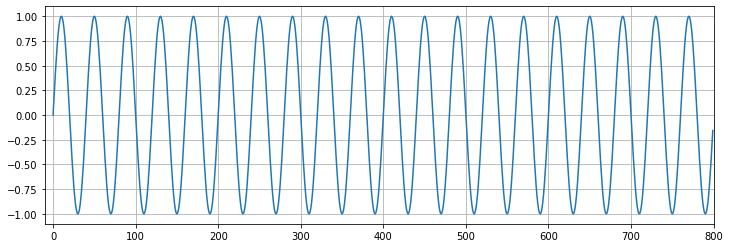

In [14]:
# Create & plot data points
x = torch.linspace(0,799,steps=800)
y = torch.sin(x*2*3.1416/40)

plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(y.numpy());

## Create train and test sets
We want to take the first 760 samples in our series as a training sequence, and the last 40 for testing.
<div class="alert alert-info"><strong>NOTE:</strong> We tend to use the terms "series" and "sequence" interchangeably. Usually "series" refers to the entire population of data, or the full time series, and "sequence" refers to some portion of it.</div>

In [17]:
test_size = 40

train_set = y[:-test_size]
test_set = y[-test_size:]

## Prepare the training data
When working with LSTM models, we start by dividing the training sequence into a series of overlapping "windows". Each window consists of a connected string of samples. The label used for comparison is equal to the next value in the sequence. In this way our network learns what value should follow a given pattern of preceding values. Note: although the LSTM layer produces a prediction for each sample in the window, we only care about the last one.

For example, say we have a series of 15 records, and a window size of 5. We feed $[x_1,..,x_5]$ into the model, and compare the prediction to $x_6$. Then we backprop, update parameters, and feed $[x_2,..,x_6]$ into the model. We compare the new output to $x_7$ and so forth up to $[x_{10},..,x_{14}]$.

To simplify matters, we'll define a function called <tt>input_data</tt> that builds a list of <tt>(seq, label)</tt> tuples. Windows overlap, so the first tuple might contain $([x_1,..,x_5],[x_6])$, the second would have $([x_2,..,x_6],[x_7])$, etc. 

Here $k$ is the width of the window. Due to the overlap, we'll have a total number of <tt>(seq, label)</tt> tuples equal to $\textrm{len}(series)-k$

In [15]:
def input_data(seq,ws):  # ws is the window size
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out

<div class="alert alert-info"><strong>NOTE:</strong> "Windows" are different from "batches". In our example we'll feed one window into the model at a time, so our batch size would be 1. If we passed two windows into the model before we backprop and update weights, our batch size would be 2.</div>

In [19]:
# From above:
# test_size = 40
# train_set = y[:-test_size]
# test_set = y[-test_size:]

window_size = 40

# Create the training dataset of sequence/label tuples:
train_data = input_data(train_set,window_size)

len(train_data) # this should equal 760-40

720

In [20]:
# Display the first (seq/label) tuple in train_data
train_data[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
          7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
         -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
         -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
 tensor([1.4480e-05]))

In [21]:
torch.set_printoptions(sci_mode=False) # to improve the appearance of tensors
train_data[0]

(tensor([     0.0000,      0.1564,      0.3090,      0.4540,      0.5878,
              0.7071,      0.8090,      0.8910,      0.9511,      0.9877,
              1.0000,      0.9877,      0.9511,      0.8910,      0.8090,
              0.7071,      0.5878,      0.4540,      0.3090,      0.1564,
             -0.0000,     -0.1564,     -0.3090,     -0.4540,     -0.5878,
             -0.7071,     -0.8090,     -0.8910,     -0.9511,     -0.9877,
             -1.0000,     -0.9877,     -0.9511,     -0.8910,     -0.8090,
             -0.7071,     -0.5878,     -0.4540,     -0.3090,     -0.1564]),
 tensor([    0.0000]))

## Define an LSTM model
Our model will have one LSTM layer with an input size of 1 and a hidden size of 50, followed by a fully-connected layer to reduce the output to the prediction size of 1.<br>
<div class="alert alert-info"><strong>NOTE:</strong> You will often see the terms <em>input_dim</em> and <em> hidden_dim</em> used in place of <em>input_size</em> and <em>hidden_size</em>. They mean the same thing. We'll stick to <em>input_size</em> and <em>hidden_size</em> to stay consistent with PyTorch's built-in keywords.</div>

During training we pass three tensors through the LSTM layer - the sequence, the hidden state $h_0$ and the cell state $c_0$.<br>

This means we need to initialize $h_0$ and $c_0$. This can be done with random values, but we'll use zeros instead.

In [22]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, out_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        
        # Add an LSTM layer:
        self.lstm = nn.LSTM(input_size,hidden_size)
        
        # Add a fully-connected layer:
        self.linear = nn.Linear(hidden_size,out_size)
        
        # Initialize h0 and c0:
        self.hidden = (torch.zeros(1,1,hidden_size),
                       torch.zeros(1,1,hidden_size))
    
    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq), 1, -1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]   # we only care about the last prediction

## Instantiate the model, define loss & optimization functions
Since we're comparing single values, we'll use <a href='https://pytorch.org/docs/stable/nn.html#mseloss'><tt><strong>torch.nn.MSELoss</strong></tt></a><br>Also, we've found that <a href='https://pytorch.org/docs/stable/optim.html#torch.optim.SGD'><tt><strong>torch.optim.SGD</strong></tt></a> converges faster for this application than <a href='https://pytorch.org/docs/stable/optim.html#torch.optim.Adam'><tt><strong>torch.optim.Adam</strong></tt></a>

In [23]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [24]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')
    
count_parameters(model)

   200
 10000
   200
   200
    50
     1
______
 10651


## Predicting future values
To show how an LSTM model improves after each epoch, we'll run predictions and plot the results. Our goal is to predict the last sequence of 40 values, and compare them to the known data in our test set. However, we have to be careful <em>not</em> to use test data in the predictions - that is, each new prediction derives from previously predicted values.

The trick is to take the last known window, predict the next value, then <em>append</em> the predicted value to the sequence and run a new prediction on a window that includes the value we've just predicted. It's like adding track in front of the train as it's moving.<br><em>Image source:</em> https://giphy.com/gifs/aardman-cartoon-train-3oz8xtBx06mcZWoNJm<br>

In this way, a well-trained model <em>should</em> follow any regular trends/cycles in the data.

## Train and simultaneously evaluate the model
We'll train 10 epochs. For clarity, we'll "zoom in" on the test set, and only display from point 700 to the end.

Epoch:  1 Loss: 0.09212877
Loss on test predictions: 0.6071590185165405


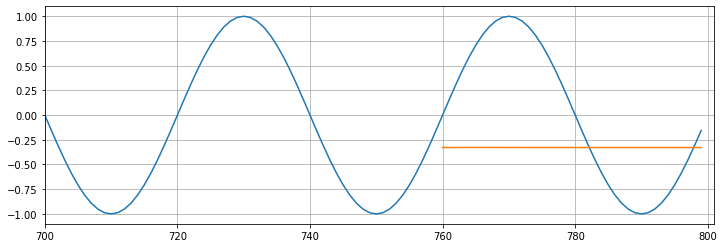

Epoch:  2 Loss: 0.06506766
Loss on test predictions: 0.5650987029075623


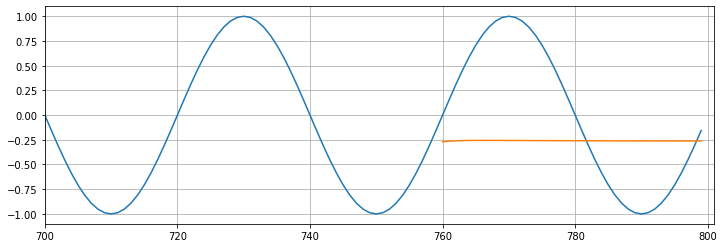

Epoch:  3 Loss: 0.04198047
Loss on test predictions: 0.5199715495109558


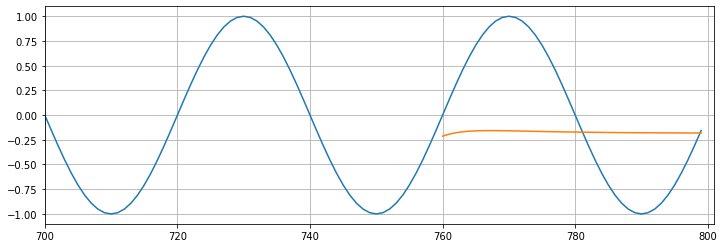

Epoch:  4 Loss: 0.01784275
Loss on test predictions: 0.42209964990615845


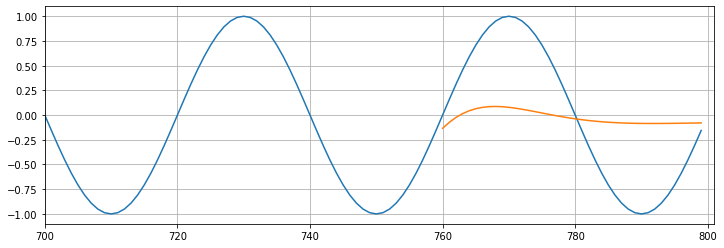

Epoch:  5 Loss: 0.00288710
Loss on test predictions: 0.16624096035957336


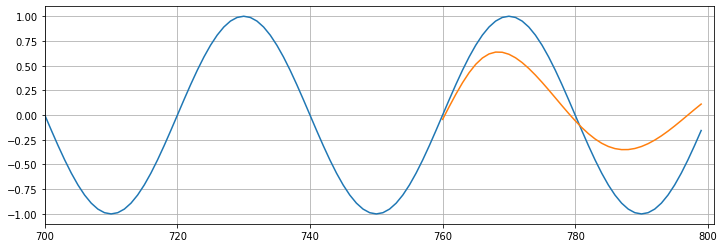

Epoch:  6 Loss: 0.00032008
Loss on test predictions: 0.030554357916116714


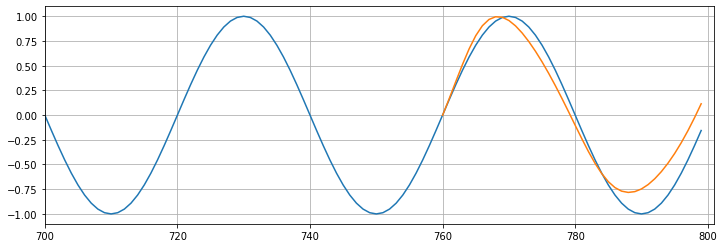

Epoch:  7 Loss: 0.00012969
Loss on test predictions: 0.014990216121077538


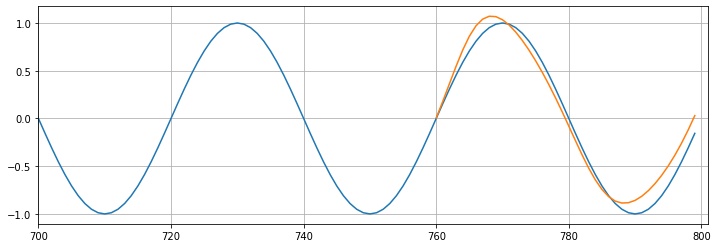

Epoch:  8 Loss: 0.00012007
Loss on test predictions: 0.01185666024684906


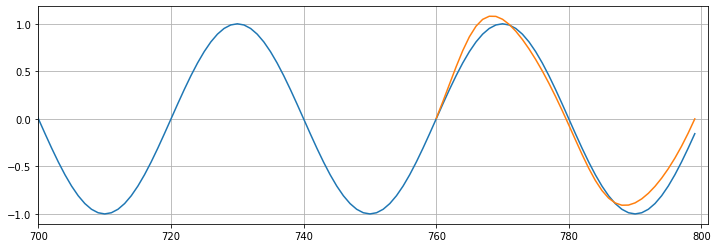

Epoch:  9 Loss: 0.00012656
Loss on test predictions: 0.010163797996938229


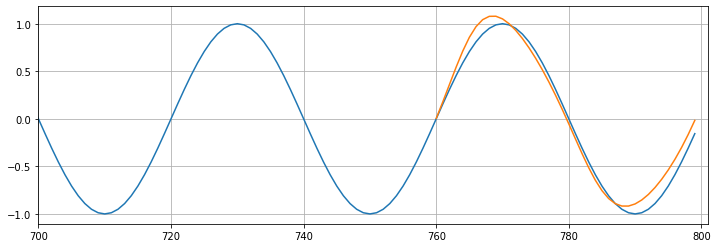

Epoch: 10 Loss: 0.00013196
Loss on test predictions: 0.008897585794329643


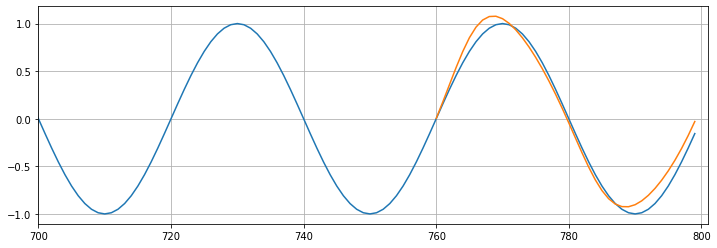

In [25]:
epochs = 10
future = 40

for i in range(epochs):
    
    # tuple-unpack the train_data set
    for seq, y_train in train_data:
        
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    # print training result
    print(f'Epoch: {i+1:2} Loss: {loss.item():10.8f}')
    
    # MAKE PREDICTIONS
    # start with a list of the last 10 training records
    preds = train_set[-window_size:].tolist()

    for f in range(future):  
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size),
                            torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())
            
    loss = criterion(torch.tensor(preds[-window_size:]),y[760:])
    print(f'Loss on test predictions: {loss}')

    # Plot from point 700 to the end
    plt.figure(figsize=(12,4))
    plt.xlim(700,801)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(760,800),preds[window_size:])
    plt.show()

# Forecasting into an unknown future
We'll continue to train our model, this time using the entire dataset. Then we'll predict what the <em>next</em> 40 points should be.

## Train the model
Expect this to take a few minutes.

In [12]:
epochs = 10
window_size = 40
future = 40

# Create the full set of sequence/label tuples:
all_data = input_data(y,window_size)
len(all_data)  # this should equal 800-40

760

In [13]:
import time
start_time = time.time()

for i in range(epochs):
    
    # tuple-unpack the entire set of data
    for seq, y_train in all_data:  
       
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        
        loss.backward()
        optimizer.step()
        
    # print training result
    print(f'Epoch: {i+1:2} Loss: {loss.item():10.8f}')
    
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Epoch:  1 Loss: 0.00013453
Epoch:  2 Loss: 0.00013443
Epoch:  3 Loss: 0.00013232
Epoch:  4 Loss: 0.00012880
Epoch:  5 Loss: 0.00012434
Epoch:  6 Loss: 0.00011931
Epoch:  7 Loss: 0.00011398
Epoch:  8 Loss: 0.00010854
Epoch:  9 Loss: 0.00010313
Epoch: 10 Loss: 0.00009784

Duration: 129 seconds


## Predict future values, plot the result

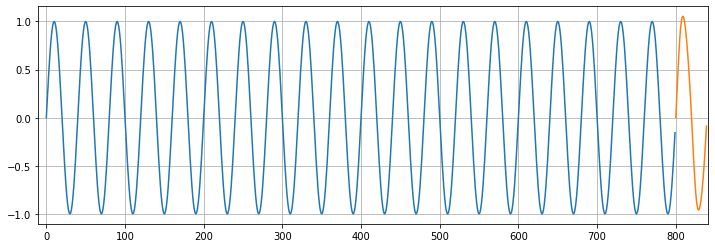

In [14]:
preds = y[-window_size:].tolist()

for i in range(future):  
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        # Reset the hidden parameters
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))  
        preds.append(model(seq).item())

plt.figure(figsize=(12,4))
plt.xlim(-10,841)
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(800,800+future),preds[window_size:])
plt.show()

## Short Assignment
Due: 21 November 2022 | 12NN | Submit the file on PDF  | 1 Page only | Use format in Research Summary assignment

1. Can you think of a few applications for a sequence-to-sequence RNN? What about a sequence-to-vector RNN, and a vector-to-sequence RNN? (2 applications, specific applications)
2. What are the main difficulties in training RNNs? How can you handle them?